<a href="https://colab.research.google.com/github/berberberk/apms-fs-2024/blob/main/APMS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [326]:
def pearson_correlation(x, y):
 mean_x = np.mean(x)
 mean_y = np.mean(y)

 sum_xy_diff = np.sum((x - mean_x) * (y - mean_y))
 sum_x_diff_sq = np.sum((x - mean_x) ** 2)
 sum_y_diff_sq = np.sum((y - mean_y) ** 2)

 correlation_coefficient = sum_xy_diff / (np.sqrt(sum_x_diff_sq) * np.sqrt(sum_y_diff_sq))

 return correlation_coefficient

In [327]:
data = np.loadtxt("1.txt", delimiter=",")

x = data[:, 0]
y = data[:, 1]


correlation_coefficient = pearson_correlation(x, y)


print("Коэффициент корреляции Пирсона:", correlation_coefficient)
print("Весьма высокая зависимость по шкале Чеддока")

n = len(x)
crit = stats.t.ppf(0.975, n - 2)


t_statistic = abs(correlation_coefficient) * np.sqrt((n - 2) / (1 - correlation_coefficient**2))

print("\nПроверка статзначимости коэффициента Пирсона:")
print("t_crit:", criФt)
print("t_exp:", abs(t_statistic))
if (crit >= abs(t_statistic)):
  print("Нулевая гипотеза не отвергается, коэффициент Пирсона равен нулю")
else:
  print("Нулевая гипотеза отвергается, коэффициент Пирсона отличен от нуля")

Коэффициент корреляции Пирсона: 0.9856075181453258
Весьма высокая зависимость по шкале Чеддока

Проверка статзначимости коэффициента Пирсона:
t_crit: 1.984467454426692
t_exp: 57.71683341587528
Нулевая гипотеза отвергается, коэффициент Пирсона отличен от нуля


In [328]:
def linear_regression(x, y):
 if len(x) != len(y):
  raise ValueError("Массивы должны иметь одинаковую длину.")

 # Рассчет сумм и средних значений
 n = len(x)
 sum_x = np.sum(x)
 sum_y = np.sum(y)
 sum_xy = np.sum(x * y)
 sum_x2 = np.sum(x**2)

 # Вычисление коэффициентов a и b
 a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
 b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

 return a, b

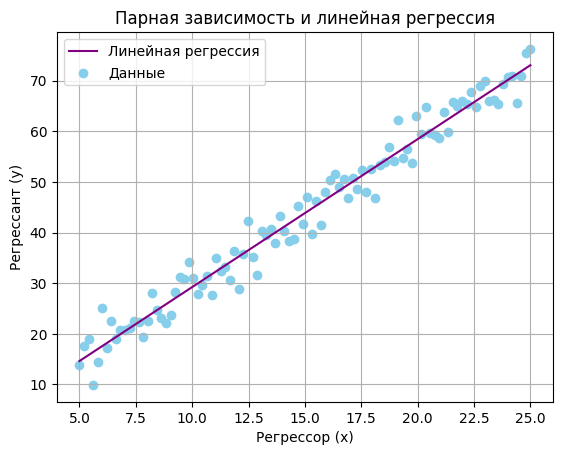

Итоговая модель зависимости: y = 2.9223753234097933 * x + 0.015329333222738186

Проверка адекватности модели по критерию Фишера
F_crit 0.7165989462583362
F_exp: 34.63871575308902
Нулевая гипотеза отвергается, дисперсии не равны => Модель адекватна


In [329]:
a, b = linear_regression(x,y)

y_predicted = a * x + b
plt.plot(x, y_predicted, color='purple', label="Линейная регрессия")
plt.scatter(x,y, c="skyblue", label="Данные")
# Настройка графика
plt.xlabel("Регрессор (x)")
plt.ylabel("Регрессант (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()


print("Итоговая модель зависимости: y = {} * x + {}".format(a, b))

print('\nПроверка адекватности модели по критерию Фишера')
sse = np.sum((y - y_predicted)**2) / (n - 2)
sst = np.sum((y - np.mean(y))**2) / (n - 1)
f_statistic = max(sse, sst) / min(sse,sst)
crit_f = stats.f.ppf(0.05, n - 2, n - 1)
print("F_crit", crit_f)
print("F_exp:", f_statistic)
if crit_f < f_statistic:
  print("Нулевая гипотеза отвергается, дисперсии не равны => Модель адекватна")
else:
  print("Нулевая гипотеза не отвергается, дисперсии равны => Модель неадекватна")

Значимость параметров:
True - значимый; False - незначимый;
a: True b: False
Доверительные интервалы коэффициентов регрессии:
a:  [2.8456447032935754, 2.9991059435260112] Длина:  0.1534612402324358 
b:  [-0.9580821650330081, 0.9887408314784846] Длина:  1.9468229965114927


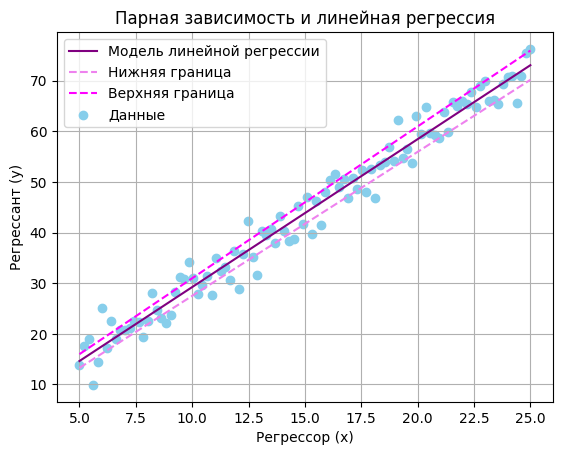

In [330]:

std_error_a = np.sqrt(sse / (np.sqrt(np.sum((x - np.mean(x))**2)) * n))
std_error_b = np.sqrt(sse * np.sqrt(sum(x ** 2)) / (np.sqrt(np.sum((x - np.mean(x))**2)) * n)  )
t_statistic_a = a / std_error_a
t_statistic_b = b / std_error_b


print("Значимость параметров:\nTrue - значимый; False - незначимый;")
print(f'a: {abs(t_statistic_a) > crit}', f'b: {abs(t_statistic_b) > crit}')


dov_a = [0] * 2
dov_a[0] = a - crit * std_error_a
dov_a[1] = a + crit * std_error_a

dov_b = [0] * 2
dov_b[0] = b - crit * std_error_b
dov_b[1] = b + crit * std_error_b

print("Доверительные интервалы коэффициентов регрессии:")
print("a: ", dov_a, "Длина: ", dov_a[1] - dov_a[0], "\nb: ", dov_b, "Длина: ", dov_b[1] - dov_b[0])

y_predicted_max = dov_a[1] * x + dov_b[1]
y_predicted_min = dov_a[0] * x + dov_b[0]
plt.plot(x, y_predicted, color='purple', label="Модель линейной регрессии")
plt.plot(x, y_predicted_min, color='violet', linestyle='--', label="Нижняя граница")
plt.plot(x, y_predicted_max, color='magenta', linestyle='--', label="Верхняя граница")
plt.scatter(x,y, color = "skyblue", label = "Данные")

plt.xlabel("Регрессор (x)")
plt.ylabel("Регрессант (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

In [331]:
print("Интервал прогноза для линейной модели на 𝜟𝒙=3 значения вперед")

s_m = np.sqrt(min(sse,sst))

dx = x[len(x) - 1] - x[len(x) - 2]

E = 0.01 * stats.t.ppf(1 - 0.05/2, n - 2) * s_m * np.sqrt((1 + 1/len(x) + (x[len(x) - 1] + dx - np.mean(x))**2 / (np.sum((x - np.mean(x))**2) * n)))

y_new_predicted_5 = a * (x[len(x) - 1] + dx) + b

dov_pred = [0] * 2
dov_pred[0] = y_new_predicted_5 - E
dov_pred[1] = y_new_predicted_5 + E

print(f"\n1. Интервальная оценка прогноза x={round(x[len(x) - 1] + dx, 3)}:")
print(dov_pred)

dx = x[len(x) - 1] - x[len(x) - 2]

E = 0.01 * stats.t.ppf(1 - 0.05/2, n - 2) * s_m * np.sqrt((1 + 1/len(x) + (x[len(x) - 1] + 2 * dx - np.mean(x))**2 / (np.sum((x - np.mean(x))**2) * n)))

y_new_predicted_5 = a * (x[len(x) - 1] + 2 * dx) + b

dov_pred = [0] * 2
dov_pred[0] = y_new_predicted_5 - E
dov_pred[1] = y_new_predicted_5 + E

print(f"\n2. Интервальная оценка прогноза x={round(x[len(x) - 1] + 2 * dx, 3)}:")
print(dov_pred)

dx = x[len(x) - 1] - x[len(x) - 2]

E = 0.01 * stats.t.ppf(1 - 0.05/2, n - 2) * s_m * np.sqrt((1 + 1/len(x) + (x[len(x) - 1] + 3 * dx - np.mean(x))**2 / (np.sum((x - np.mean(x))**2) * n)))

y_new_predicted_5 = a * (x[len(x) - 1] + 3 * dx) + b

dov_pred = [0] * 2
dov_pred[0] = y_new_predicted_5 - E
dov_pred[1] = y_new_predicted_5 + E

print(f"\n3. Интервальная оценка прогноза x={round(x[len(x) - 1] + 3 * dx, 3)}:")
print(dov_pred)

Интервал прогноза для линейной модели на 𝜟𝒙=3 значения вперед

1. Интервальная оценка прогноза x=25.202:
[73.60619518784597, 73.72398735551735]

2. Интервальная оценка прогноза x=25.404:
[74.19657368425831, 74.31436656553322]

3. Интервальная оценка прогноза x=25.606:
[74.78695217367675, 74.90474578254296]



Проверка на однородность групп признака d1

Группа d1=0
Наклон (a): -0.15407317886776115
Свободный член (b): 2.3559230626619376

Группа d1=1
Наклон (a): -2.739860968316767
Свободный член (b): -2.8869908980158376

Тест Чоу для признака d1
F_crit:  0.05130672020965364 
F_exp:  17773.41368308139
Нулевая гипотеза отвергается, подвыборки неоднородны. Деление по выбранному признаку d1 имеет смысл.

Проверка на однородность групп признака d2

Группа d2=0
Наклон (a): -1.2879742519135484
Свободный член (b): -4.230053030649728

Группа d2=1
Наклон (a): -1.4923546151199514
Свободный член (b): 1.584289249240022

Тест Чоу для признака d2
F_crit:  0.05130672020965364 
F_exp:  0.3818202706833811
Нулевая гипотеза отвергается, подвыборки неоднородны. Деление по выбранному признаку d2 имеет смысл.


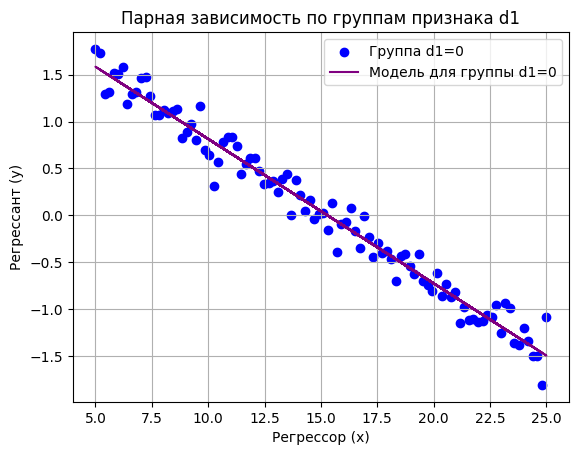

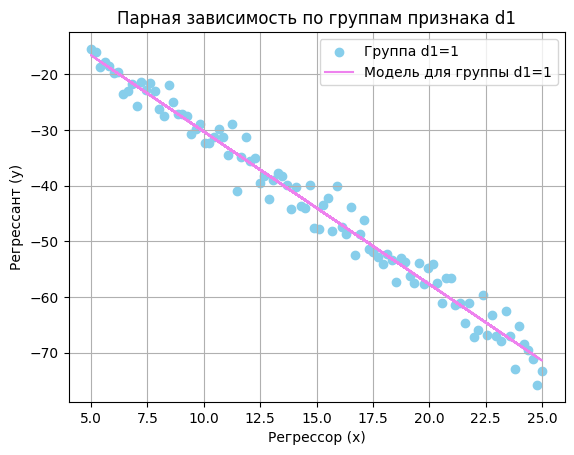

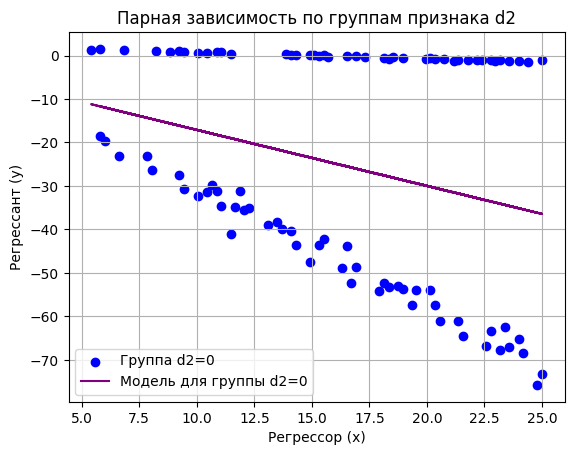

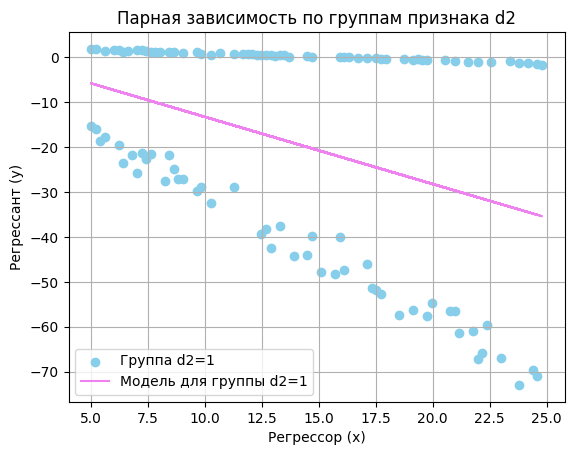

In [332]:
data = np.loadtxt("2.txt", delimiter=",")

x = data[:, 0]
y = data[:, 3]

for i in range(1, 3):
  print(f'\nПроверка на однородность групп признака d{i}')
  group1 = data[:, i] == 0
  group2 = data[:, i] == 1

  x_group1 = x[group1]
  y_group1 = y[group1]
  x_group2 = x[group2]
  y_group2 = y[group2]


  a_group1, b_group1 = linear_regression(x_group1, y_group1)
  a_group2, b_group2 = linear_regression(x_group2, y_group2)
  a, b = linear_regression(x, y)


  print(f"\nГруппа d{i}=0")
  print("Наклон (a):", a_group1)
  print("Свободный член (b):", b_group1)

  print(f"\nГруппа d{i}=1")
  print("Наклон (a):", a_group2)
  print("Свободный член (b):", b_group2)


  y_predicted_all = a * x + b
  sse_all = np.sum((y - y_predicted_all)**2)

  # Вычисляем SSE для отдельных моделей
  sse_group1 = np.sum((y_group1 - (a_group1 * x_group1 + b_group1))**2)
  sse_group2 = np.sum((y_group2 - (a_group2 * x_group2 + b_group2))**2)

  # Считаем F-статистику
  f_statistic = ((sse_all - (sse_group1 + sse_group2)) / 2) / ((sse_group1 + sse_group2) / (len(x) - 2))
  print(f"\nТест Чоу для признака d{i}")
  print("F_crit: ", stats.f.ppf(0.05, 2, len(x) - 4), "\nF_exp: ", f_statistic)
  if stats.f.ppf(0.05, 2, len(x) - 4) < f_statistic:
    print(f"Нулевая гипотеза отвергается, подвыборки неоднородны. Деление по выбранному признаку d{i} имеет смысл.")
  else:
      print(f"Нулевая гипотеза не отвергается, подвыборки однородны. Деление по выбранному признаку d{i} смысла не имеет.")


for i in range(1, 3):
  if True:
    groups = list(map(int, np.unique(data[:, i])))
    scatter_c = ['blue', 'skyblue']
    plot_c = ['purple', 'violet']
    for group in groups:
      group_indices = data[:, i] == group
      x_group = x[group_indices]
      y_group = y[group_indices]
      a_group, b_group = linear_regression(x_group, y_group)
      y_predicted_group = a_group * x_group + b_group
      plt.scatter(x_group, y_group, c=scatter_c[group], label=f"Группа d{i}={int(group)}")
      plt.plot(x_group, y_predicted_group, color=plot_c[group], label=f'Модель для группы d{i}={int(group)}')
      plt.xlabel("Регрессор (x)")
      plt.ylabel("Регрессант (y)")
      plt.title(f"Парная зависимость по группам признака d{i}")
      plt.legend()
      plt.grid(True)
      plt.show()

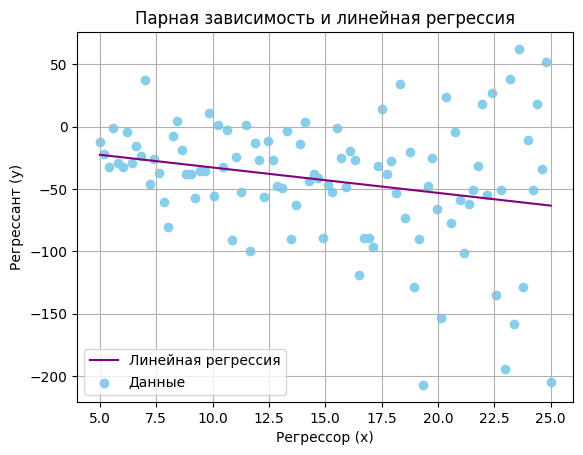

Итоговая модель зависимости: y = -2.0376153400011443 * x + -12.392742428350005

Проверка адекватности модели по критерию Фишера
F_crit 0.7165989462583362
F_exp: 1.0486446475995366
Нулевая гипотеза отвергается, дисперсии не равны => Модель адекватна


In [333]:
data = np.loadtxt("3.txt", delimiter=",")

x = data[:, 0]
y = data[:, 1]

a, b = linear_regression(x,y)

y_predicted = a * x + b
plt.plot(x, y_predicted, color='purple', label="Линейная регрессия")
plt.scatter(x,y, c="skyblue", label="Данные")
# Настройка графика
plt.xlabel("Регрессор (x)")
plt.ylabel("Регрессант (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()


print("Итоговая модель зависимости: y = {} * x + {}".format(a, b))

print('\nПроверка адекватности модели по критерию Фишера')
sse = np.sum((y - y_predicted)**2) / (n - 2)
sst = np.sum((y - np.mean(y))**2) / (n - 1)
f_statistic = max(sse, sst) / min(sse,sst)
crit_f = stats.f.ppf(0.05, n - 2, n - 1)
print("F_crit", crit_f)
print("F_exp:", f_statistic)
if crit_f < f_statistic:
  print("Нулевая гипотеза отвергается, дисперсии не равны => Модель адекватна")
else:
  print("Нулевая гипотеза не отвергается, дисперсии равны => Модель неадекватна")

Значимость параметров:
True - значимый; False - незначимый;
a: True b: False
Доверительные интервалы коэффициентов регрессии:
a:  [-3.318033812150806, -0.7571968678514829] Длина:  2.5608369442993233 
b:  [-28.636245497682033, 3.850760640982024] Длина:  32.48700613866406


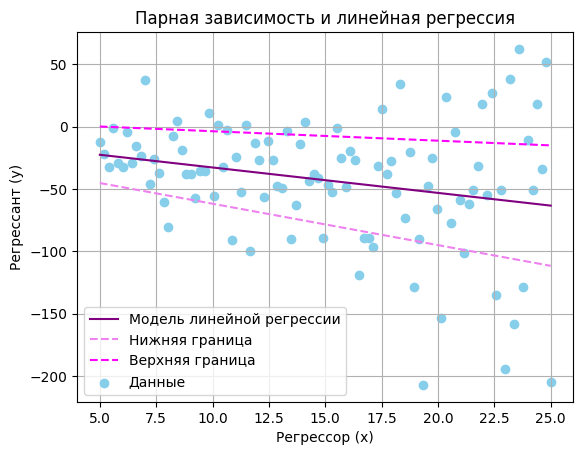

In [334]:

std_error_a = np.sqrt(sse / (np.sqrt(np.sum((x - np.mean(x))**2)) * n))
std_error_b = np.sqrt(sse * np.sqrt(sum(x ** 2)) / (np.sqrt(np.sum((x - np.mean(x))**2)) * n)  )
t_statistic_a = a / std_error_a
t_statistic_b = b / std_error_b


print("Значимость параметров:\nTrue - значимый; False - незначимый;")
print(f'a: {abs(t_statistic_a) > crit}', f'b: {abs(t_statistic_b) > crit}')


dov_a = [0] * 2
dov_a[0] = a - crit * std_error_a
dov_a[1] = a + crit * std_error_a

dov_b = [0] * 2
dov_b[0] = b - crit * std_error_b
dov_b[1] = b + crit * std_error_b

print("Доверительные интервалы коэффициентов регрессии:")
print("a: ", dov_a, "Длина: ", dov_a[1] - dov_a[0], "\nb: ", dov_b, "Длина: ", dov_b[1] - dov_b[0])

y_predicted_max = dov_a[1] * x + dov_b[1]
y_predicted_min = dov_a[0] * x + dov_b[0]
plt.plot(x, y_predicted, color='purple', label="Модель линейной регрессии")
plt.plot(x, y_predicted_min, color='violet', linestyle='--', label="Нижняя граница")
plt.plot(x, y_predicted_max, color='magenta', linestyle='--', label="Верхняя граница")
plt.scatter(x,y, color = "skyblue", label = "Данные")

plt.xlabel("Регрессор (x)")
plt.ylabel("Регрессант (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

Итоговая модель зависимости: y = -2.0376153400011443 * x + -12.392742428350005
crit 0.7165989462583362 Stat:  1.0486446475995366
Нулевая гипотеза отвергается, дисперсии не равны


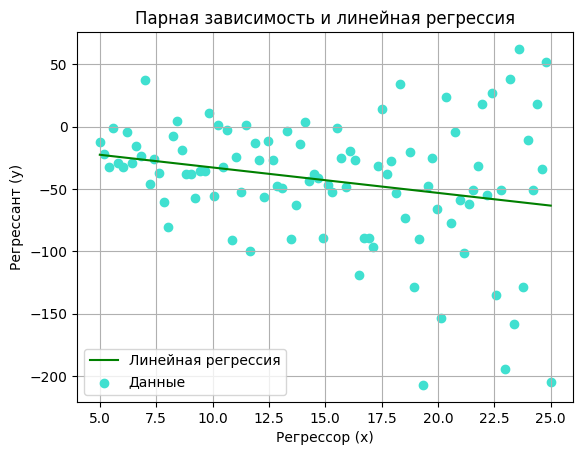

In [335]:
import pandas as pd
data = np.loadtxt("3.txt", delimiter=",")

x = data[:, 0]
y = data[:, 1]

a, b = linear_regression(x, y)

n = len(x)


print("Итоговая модель зависимости: y = {} * x + {}".format(a, b))

y_predicted = a * x + b

sse = np.sum((y - y_predicted)**2) / (n - 2)


sst = np.sum((y - np.mean(y))**2) / (n - 1)

f_statistic = max(sse, sst) / min(sse,sst)

crit_f = stats.f.ppf(0.05, n - 2, n - 1)

print("crit", crit_f,"Stat: ", f_statistic)
if crit_f < f_statistic:
  print("Нулевая гипотеза отвергается, дисперсии не равны")
else:
  print("Нулевая гипотеза не отвергается, дисперсии равны")



plt.plot(x, y_predicted, color='green', label="Линейная регрессия")
plt.scatter(x,y, color = "turquoise", label = "Данные")

plt.xlabel("Регрессор (x)")
plt.ylabel("Регрессант (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

In [336]:
std_error_a = np.sqrt(sse / (np.sqrt(np.sum((x - np.mean(x))**2)) * n))

std_error_b = np.sqrt(sse * np.sqrt(sum(x ** 2)) / (np.sqrt(np.sum((x - np.mean(x))**2)) * n)  )
t_statistic_a = a / std_error_a
t_statistic_b = b / std_error_b

print("Значимость параметров:\nTrue - значимый; False - незначимый;")
print(f'a: {abs(t_statistic_a) > crit}', f'b: {abs(t_statistic_b) > crit}')



ostat = abs(y - y_predicted)

ranked_x = pd.Series(x).rank()
ranked_y = pd.Series(y - y_predicted).rank()


spearman = 1 - ((6 *(sum(ranked_y - ranked_x) + 1)) / (n* (n**2 - 1)))

t_stat = (spearman * np.sqrt(n - 2)) / (np.sqrt(1 - spearman**2))
crit_t = stats.t.ppf(0.975, n - 2)

print("\nТест ранговой корреляции Спирмена")
print("t_crit: ", crit_t, "\nt_exp: ", t_stat)
if crit_t >= t_stat:

  print("Дисперсии однородны, по данному критерию мы не можем утверждать наличие гетероскедастичности")
else:
  print("Дисперсии неоднородны, имеет место гетероскедастичность")

n_pred = len(y_predicted)


quarter1 = int(0.375 * n)
quarter3 = int(0.625 * n)

ready_pred = pd.DataFrame(y_predicted).drop(index = range(quarter1, quarter3))

m1 = ready_pred.iloc[: int((3/8) * n_pred)]
m2 = ready_pred.iloc[int((3/8) * n_pred) :int((3/8) * n_pred * 2)]

# print(y_predicted, m1, m2)

sse1 = np.sum((pd.DataFrame(y).iloc[: int((3/8) * n_pred)] - m1)**2) / (len(m1) - 1)
sse2 = np.sum((pd.DataFrame(y).iloc[int((3/8) * n_pred) :int((3/8) * n_pred * 2)] - m2)**2) / (len(m2) - 1)

# print(sse2[0])
f_stat = sse1[0] / sse2[0]
f_crit = stats.f.ppf(0.05, len(m1) - 1, len(m2) - 1)

print("\nТест Голдфелда-Квандта")
print("F_crit: ", f_crit, "\nF_exp: ", f_stat)
if f_stat > f_crit:
  print("Дисперсии не равны, имеет место гетероскедастичность\n")
else:
  print("Дисперсии равны, по данному критерию мы не можем утверждать наличие гетероскедастичности\n")

Значимость параметров:
True - значимый; False - незначимый;
a: True b: False

Тест ранговой корреляции Спирмена
t_crit:  1.984467454426692 
t_exp:  2857.5822823051185
Дисперсии неоднородны, имеет место гетероскедастичность

Тест Голдфелда-Квандта
F_crit:  0.5752603347787958 
F_exp:  0.6046814519579229
Дисперсии не равны, имеет место гетероскедастичность



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
